# Scraping 101

# Currency

В качестве примера сбора данных, мы хотим выяснить как изменялся курс валют со временем.

Есть хороший и бесплатный сайт https://openexchangerates.org. Он позволяет через API получать курсы валют. 

**КСТАТИ**, API означает "Application Programming Interface" и представляет из себя набор функций и методов, которые позволяют создавать приложения с доступом к данным или функциям ОС, приложений и сервисов. 

* Для получения уникального **APP ID** нужно [зарегистрироваться](https://openexchangerates.org/signup/free) . Это позволит им отслеживать количество обращений к их системе и блокировать запросы, если их количество  или частота слишком большая.

APP ID состоит из 32 символов, для удобства он уже находится в строке

In [53]:
app_id =  "6b89ab2d5cf5439a8b77db87f72cab72"

А теперь давайте что-нибудь скачаем. Их [документация](https://openexchangerates.org/documentation) поможет нам построить корректную ссылку. 

In [57]:
# из документации:
# http://openexchangerates.org/api/latest.json?app_id=YOUR_APP_ID

# построим ссылку по частям:
base_url = "http://openexchangerates.org/api"
id_str   = "app_id=%s" % app_id
url = "%s/historical/2011-10-18.json?%s" % (base_url, id_str) # этот формат указывает на конец страницы

Ок, теперь скачаем эту страницу и посмотрим что мы получили

In [59]:
import requests

page = requests.get(url)
text = page.text

# теперь выведем начало и конец текста:
print(text)

{
  "disclaimer": "Usage subject to terms: https://openexchangerates.org/terms",
  "license": "https://openexchangerates.org/license",
  "timestamp": 1318953600,
  "base": "USD",
  "rates": {
    "AED": 3.67285,
    "AFN": 48.325965,
    "ALL": 102.607855,
    "AMD": 376.327731,
    "ANG": 1.77665,
    "AOA": 94.851761,
    "ARS": 4.215038,
    "AUD": 0.979142,
    "AWG": 1.79025,
    "AZN": 0.786155,
    "BAM": 1.429934,
    "BBD": 2,
    "BDT": 75.987773,
    "BGN": 1.430108,
    "BHD": 0.37653,
    "BIF": 1231.30548,
    "BMD": 1,
    "BND": 1.272581,
    "BOB": 7.013496,
    "BRL": 1.767354,
    "BSD": 1,
    "BTN": 49.334603,
    "BWP": 7.340381,
    "BYR": 4395.431805,
    "BZD": 1.99315,
    "CAD": 1.018634,
    "CDF": 915.22783,
    "CHF": 0.900405,
    "CLF": 0.021176,
    "CLP": 510.174179,
    "CNY": 6.3813,
    "COP": 1894.791035,
    "CRC": 510.707928,
    "CVE": 80.624452,
    "CZK": 18.206884,
    "DJF": 177.721,
    "DKK": 5.434641,
    "DOP": 38.360152,
    "DZD": 73.7

Теперь хотелось бы получить данные в удобном для человека виде.

Нам подойдет формат [JSON (Javascript Object Notation)](http://en.wikipedia.org/wiki/JSON). Он должен быть вам знаком, потому что выглядит как словарь в python.

Данный формат стал  **очень популярным в последнее время** потому что это также **объект Javascript**. Это означает, что браузеры могут легко прочитать строку JSON. Другие форматы, например XML, требуют больших усилий.

#### JSON в Python

Давайте посмотрим как использовать JSON в python и затем вернем данные с курсам валют.

In [62]:
import json

D = {"name" : "Alice"}
json_str = json.dumps(D) # dumps -> пустая строка
print(json_str)
print(type(json_str))

{"name": "Alice"}
<class 'str'>


JSON может также представлять не только словарь, но список словарей:


In [66]:
string = '[ {"name":"Bob","age":28}, {"name":"Alice","age":23} ]'
print(type(string))
D = json.loads(string)
print(D)
print( type(D))
print( D[0]["name"], D[0]["age"])
print( type(D[0]))

<class 'str'>
[{'name': 'Bob', 'age': 28}, {'name': 'Alice', 'age': 23}]
<class 'list'>
Bob 28
<class 'dict'>


Отлично! Это значит что мы можем взять текст с сайта и представить данные в удобном словаре:

In [67]:
data = json.loads(text) # Данные, полученные от нашего API
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['disclaimer', 'license', 'timestamp', 'base', 'rates'])


In [68]:
data

{'disclaimer': 'Usage subject to terms: https://openexchangerates.org/terms',
 'license': 'https://openexchangerates.org/license',
 'timestamp': 1318953600,
 'base': 'USD',
 'rates': {'AED': 3.67285,
  'AFN': 48.325965,
  'ALL': 102.607855,
  'AMD': 376.327731,
  'ANG': 1.77665,
  'AOA': 94.851761,
  'ARS': 4.215038,
  'AUD': 0.979142,
  'AWG': 1.79025,
  'AZN': 0.786155,
  'BAM': 1.429934,
  'BBD': 2,
  'BDT': 75.987773,
  'BGN': 1.430108,
  'BHD': 0.37653,
  'BIF': 1231.30548,
  'BMD': 1,
  'BND': 1.272581,
  'BOB': 7.013496,
  'BRL': 1.767354,
  'BSD': 1,
  'BTN': 49.334603,
  'BWP': 7.340381,
  'BYR': 4395.431805,
  'BZD': 1.99315,
  'CAD': 1.018634,
  'CDF': 915.22783,
  'CHF': 0.900405,
  'CLF': 0.021176,
  'CLP': 510.174179,
  'CNY': 6.3813,
  'COP': 1894.791035,
  'CRC': 510.707928,
  'CVE': 80.624452,
  'CZK': 18.206884,
  'DJF': 177.721,
  'DKK': 5.434641,
  'DOP': 38.360152,
  'DZD': 73.752369,
  'EGP': 5.97649,
  'ETB': 17.126396,
  'EUR': 0.727941,
  'FJD': 1.85978,
  'FKP

Мы видим в списке ключ timestamp. Что он нам дает?

In [70]:
print(data["timestamp"])

1318953600


Это формат времени UNIX.

Этот формат так популярен, что модуль `datetime` имеет встроенный метод для работы с ним `fromtimestamp`:

In [71]:
import datetime
t = datetime.datetime.fromtimestamp(data["timestamp"])

print( t)
print( type(t)) # это datetime, а не timedelta.

2011-10-18 19:00:00
<class 'datetime.datetime'>


Есть также ключи `base` и `rates`. Они представляют собой реальный обменный курс:

In [74]:
print(data["base"])
print(type(data["rates"]))
print(data["rates"].keys()) # выводим первые 5 ключей

USD
<class 'dict'>
dict_keys(['AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG', 'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BIF', 'BMD', 'BND', 'BOB', 'BRL', 'BSD', 'BTN', 'BWP', 'BYR', 'BZD', 'CAD', 'CDF', 'CHF', 'CLF', 'CLP', 'CNY', 'COP', 'CRC', 'CVE', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'ETB', 'EUR', 'FJD', 'FKP', 'GBP', 'GEL', 'GHS', 'GIP', 'GMD', 'GNF', 'GTQ', 'GYD', 'HKD', 'HNL', 'HRK', 'HTG', 'HUF', 'IDR', 'IEP', 'ILS', 'INR', 'IQD', 'IRR', 'ISK', 'JMD', 'JOD', 'JPY', 'KES', 'KGS', 'KHR', 'KMF', 'KPW', 'KRW', 'KWD', 'KZT', 'LAK', 'LBP', 'LKR', 'LRD', 'LSL', 'LTL', 'LVL', 'LYD', 'MAD', 'MDL', 'MGA', 'MKD', 'MMK', 'MNT', 'MOP', 'MRO', 'MUR', 'MVR', 'MWK', 'MXN', 'MYR', 'MZN', 'NAD', 'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK', 'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RON', 'RSD', 'RUB', 'RWF', 'SAR', 'SBD', 'SCR', 'SDG', 'SEK', 'SGD', 'SHP', 'SLL', 'SOS', 'SRD', 'STD', 'SVC', 'SYP', 'SZL', 'THB', 'TJS', 'TMT', 'TND', 'TOP', 'TRY', 'TTD', 'TWD', 'TZS

`base` скажет нам относительно какой валюты мы смотрим обменным курс.  `rates` в другом словаре хранят названия валют.

In [76]:
print (data["rates"]["USD"])

1


Все верно, ведь обмен между USD всегда равен 1, т.к. мы обмениваем его с самим собой.  Давайте посмотрим есть ли обменный курс с евро и отобразим его:

In [77]:
if( data["rates"]["EUR"]):
    print( 'EURO included', data["rates"]["EUR"])

EURO included 0.727941


#### Собираем все вместе

Давайте сделаем цикл по годам и месяцам между 2010 и 2011 годами, скачаем данные для каждого месяца и сохраним все в один большой словарь кортежей (годы,месяца):

In [78]:
time2data = {}
for year in range(2010,2011+1):
    for month in range(1,12):
        
        f = "%i-%02i-01.json" % (year,month) # Это строка будет содержать даты, для которых мы запросили курс обмена
        ids = "app_id=" + app_id
        
        url = base_url + "/historical/%s?%s" % (f,ids)
        
        json_str = requests.get(url).text
        data = json.loads(json_str)
        
     
        time2data[(year,month)] = data
            

In [79]:
time2data

{(2010,
  1): {'disclaimer': 'Usage subject to terms: https://openexchangerates.org/terms', 'license': 'https://openexchangerates.org/license', 'timestamp': 1262365200, 'base': 'USD', 'rates': {'AED': 3.67275,
   'AFN': 48.550089,
   'ALL': 96.435505,
   'AMD': 377.894224,
   'ANG': 1.791,
   'AOA': 89.174867,
   'ARS': 3.79928,
   'AUD': 1.108609,
   'AWG': 1.79025,
   'AZN': 0.802601,
   'BAM': 1.363,
   'BBD': 2,
   'BDT': 68.875969,
   'BGN': 1.35765,
   'BHD': 0.3765,
   'BIF': 1136.687381,
   'BMD': 1,
   'BND': 1.400814,
   'BOB': 7.020063,
   'BRL': 1.741616,
   'BSD': 1,
   'BTN': 46.390556,
   'BWP': 6.684572,
   'BYR': 2862.268784,
   'BZD': 1.9875,
   'CAD': 1.048367,
   'CDF': 890.00504,
   'CHF': 1.0338,
   'CLP': 507.427443,
   'CNY': 6.828759,
   'COP': 2044.171135,
   'CRC': 554.506762,
   'CVE': 76.538942,
   'CZK': 18.390696,
   'DJF': 177.721,
   'DKK': 5.180377,
   'DOP': 36.205077,
   'DZD': 71.326541,
   'EEK': 10.860498,
   'EGP': 5.486778,
   'ETB': 10.756432,


Не плохо, заняло всего пару секунд. Посмотрим теперь на полученные данные:

In [80]:
list_ex = []
list_ts = []

for y_m in sorted(time2data.keys()): # sorted() сортируем чтобы
                                     # идти по словарю в порядке времени
    list_ts.append(y_m)
    
    data = time2data[y_m]
    exch_eur = data["rates"]["EUR"]
    list_ex.append(exch_eur)

Это дает нам список кортежей (год, месяц) и список EUR->USD обменного курса (т.к `base` всегда USD).

Мы сейчас можем оставить информацию о времени такой какая она есть, но `matplotlib` дает нам отличные инструменты для работы со встроенным типом времени. Поэтому давайте конвертируем  наш кортеж`(1999,3)` в тип `datetime`.

In [81]:
list_ts

[(2010, 1),
 (2010, 2),
 (2010, 3),
 (2010, 4),
 (2010, 5),
 (2010, 6),
 (2010, 7),
 (2010, 8),
 (2010, 9),
 (2010, 10),
 (2010, 11),
 (2011, 1),
 (2011, 2),
 (2011, 3),
 (2011, 4),
 (2011, 5),
 (2011, 6),
 (2011, 7),
 (2011, 8),
 (2011, 9),
 (2011, 10),
 (2011, 11)]

In [82]:
list_dt = []
for yr,mo in list_ts:
    dt = datetime.datetime(year=yr,month=mo,day=1)
    list_dt.append(dt)

In [83]:
list_dt

[datetime.datetime(2010, 1, 1, 0, 0),
 datetime.datetime(2010, 2, 1, 0, 0),
 datetime.datetime(2010, 3, 1, 0, 0),
 datetime.datetime(2010, 4, 1, 0, 0),
 datetime.datetime(2010, 5, 1, 0, 0),
 datetime.datetime(2010, 6, 1, 0, 0),
 datetime.datetime(2010, 7, 1, 0, 0),
 datetime.datetime(2010, 8, 1, 0, 0),
 datetime.datetime(2010, 9, 1, 0, 0),
 datetime.datetime(2010, 10, 1, 0, 0),
 datetime.datetime(2010, 11, 1, 0, 0),
 datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2011, 2, 1, 0, 0),
 datetime.datetime(2011, 3, 1, 0, 0),
 datetime.datetime(2011, 4, 1, 0, 0),
 datetime.datetime(2011, 5, 1, 0, 0),
 datetime.datetime(2011, 6, 1, 0, 0),
 datetime.datetime(2011, 7, 1, 0, 0),
 datetime.datetime(2011, 8, 1, 0, 0),
 datetime.datetime(2011, 9, 1, 0, 0),
 datetime.datetime(2011, 10, 1, 0, 0),
 datetime.datetime(2011, 11, 1, 0, 0)]

Используем метод date2numl из matplotlibs:

In [84]:
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


И теперь нарисуем красивый график:

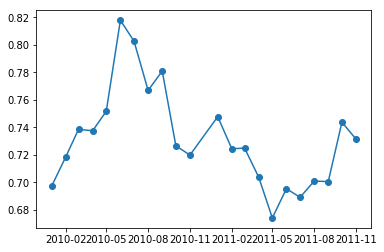

In [91]:
plt.plot_date(list_dt, list_ex, "o-")
plt.show()

Создадим второй график, но уже по годам. Также обратите внимание на сколько мощным является модуль matplotlibs:

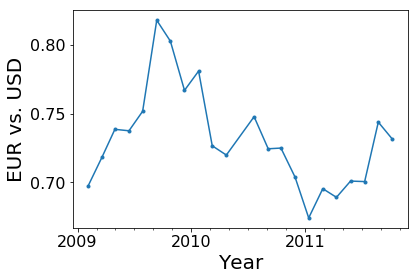

In [92]:
fig, ax = plt.subplots()
plt.plot_date(list_dt, list_ex, ".-")


# причещем все:
plt.xlabel("Year",        fontsize=20)
plt.ylabel("EUR vs. USD", fontsize=20)
plt.tick_params(labelsize=16)
max_xticks = 3
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
min_locator=matplotlib.ticker.AutoMinorLocator(6)
ax.xaxis.set_minor_locator(min_locator)

Полный код всей программы, но уже с другими датами

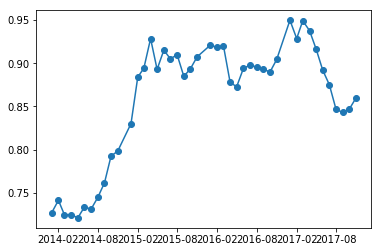

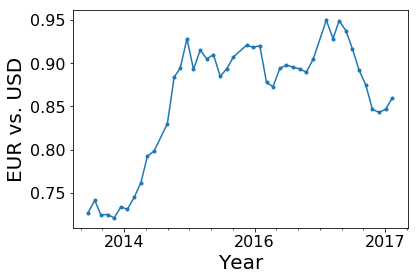

In [93]:
import json
import datetime
import requests
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib

app_id =  "6b89ab2d5cf5439a8b77db87f72cab72"

time2data = {}
for year in range(2014,2017+1):
    for month in range(1,12):
        
        f = "%i-%02i-01.json" % (year,month)
        ids = "app_id=" + app_id
        
        url = base_url + "/historical/%s?%s" % (f,ids)
        
        json_str = requests.get(url).text
        data = json.loads(json_str)
        
        time2data[(year,month)] = data
        
list_ex = []
list_ts = []

for y_m in sorted(time2data.keys()): 
    list_ts.append(y_m)
    
    data = time2data[y_m]
    exch_eur = data["rates"]["EUR"]
    list_ex.append(exch_eur)
    
list_dt = []
for yr,mo in list_ts:
    dt = datetime.datetime(year=yr,month=mo,day=1)
    list_dt.append(dt)
    

%matplotlib inline
dates = matplotlib.dates.date2num(list_dt)

plt.plot_date(dates, list_ex, "o-")
plt.show()

fig, ax = plt.subplots()
plt.plot_date(dates, list_ex, ".-")

# clean it up:
plt.xlabel("Year",        fontsize=20)
plt.ylabel("EUR vs. USD", fontsize=20)
plt.tick_params(labelsize=16)
max_xticks = 3
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
min_locator=matplotlib.ticker.AutoMinorLocator(6)
ax.xaxis.set_minor_locator(min_locator)

# Duma

В этом примере мы зайдем на сайт государственной думы и попробуем получить данные обо всех ее депутатах, в какой фракции и комитете он состоит, а также занимаю должность. Все это в итоге представим в виде DataFrame и сохраним как csv файл, для дальнейшей работы.

Делаем все как обычно, заходим на сайт думы, используем requests и BeatifulSoup

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

url = "http://duma.gov.ru/duma/deputies/7/"
page = requests.get(url)

text = page.text
soup = BeautifulSoup(text, "html.parser")

Имена депутатов будет хранить в deputates, комитеты в которых они состоят в commissions, должность в occupations и партию в party.



In [44]:
deputates = []
commissions = []
occupations = []
party = []

Депутатов много (487 человек) и скрейпинг может занимать прилично времени. Поэтому ограничим количество обработанных человек с помощью счетчика count и проверки. Для примера оставим 10 человек.

Данные обо всхе депутатах находятся в теге "a" и с классом "person__image-wrapper person__image-wrapper--s"

Найдем все такие теги

In [45]:
count = 0    
person = soup.find_all('a', class_ = "person__image-wrapper person__image-wrapper--s")

Теперь для каждого депутата мы должны получить его имя и ссылку, по которой мы пройдем и выясним остальную информацию: комитет, должность и фракцию.

К нашему счастью вместе с фото депутата в теге "img" хранится элемент  "alt" которой по наведению на фото, покажет в левом нижнем углу текст, который в нашем случае представляет собой Имя Фамилию и Отчество. Если бы не это, нам пришлось бы делать два поиска по тегам, т.к. имя хранится в одном теге, а фамилия и отчество в другом.

В том же теге "img" хранится ссылка на страницу с этим конкретным депутатом. Получим ее из элемента "href". Поэтому не нужно делать новый поиск тега.

Делаем обычный request к странице депутата, как мы делали в примере с PDF.

На странице с депутатом нам нужно найти тег в котором хранится его комитет и фракция. Посмотрев исходный код страницы, находим нужные теги - "a" с классами link "link--underline link--external" и "link link--underline person__description__link". Сохраняем их по своим массивам

Одна проблема, должность в комитете находится в строке с самим комитетом. Но к нашему счастью, они указываются в скобочках. Поэтому найдем индекс первого появления скобочек в строке с комитетом. Вырежем их и запишем в нужный массив. Точно также запишем комитет, обрезав у него конец строки

In [53]:
person[0]

<a class="person__image-wrapper person__image-wrapper--s" href="/duma/persons/99112936/" itemprop="url">
<picture>
<img alt="Авдеев Александр Александрович" class="person__image person__image--s" itemprop="image" src="/media/persons/240x240/OM9mmw6lAZ1lhnpM1yYBIMAo1BaQgxnz.jpg"/>
</picture>
</a>

In [67]:
for p in person:
    print(p.find('img'))
    name = p.find('img')
    print(name.get('alt'))
    print(p.get('href'))
    print(deputates)
    url_deput = "http://duma.gov.ru/" + p.get("href")
    print(url_deput)
    page = requests.get(url_deput)
    soup_deput = BeautifulSoup(page.text, "html.parser")
    comm = soup_deput.find('a', class_ = "link link--underline link--external")
    #print(comm)
    t = comm.text.strip()
    t_new = t[:t.find('(')]
    print(t_new)
    break

<img alt="Авдеев Александр Александрович" class="person__image person__image--s" itemprop="image" src="/media/persons/240x240/OM9mmw6lAZ1lhnpM1yYBIMAo1BaQgxnz.jpg"/>
Авдеев Александр Александрович
/duma/persons/99112936/
[]
http://duma.gov.ru//duma/persons/99112936/
Комитет по контролю и Регламенту 


In [65]:
t = comm.text.strip()
t[t.find('(')]

'('

In [68]:
for p in person:  
    
    # Обрезаем скрейпинг, т.к. очень долго идет обработка
    if count > 10:
        break
    
    #Получаем имена
    name = p.find('img', class_ = 'person__image person__image--s') # находим тег img и забираем из него значение alt
    deputates.append(name.get("alt"))
    
    # Получаем ссылку на депутата
    url_deput = "http://duma.gov.ru/" + p.get("href") # в нашем найденном теге уже есть нужная ссылка на депутата. Забираем ее
    
    # Делаем запрос
    page = requests.get(url_deput)
    soup_deput = BeautifulSoup(page.text, "html.parser")
    
    #Ищем комитет
    comm = soup_deput.find('a', class_ = "link link--underline link--external")
    t = comm.text.strip("\n")
    # регулярным выражением убираем все непечатный символы
    commissions.append(re.sub('\W+',' ',t[:t.index("(")-1]).strip()) # убираем должность
    occupations.append(t[t.index("(") + 1:t.index(")")]) #должность всегда в скобочках, 
                                                         #находим первые вхождени ( и )

    # Поиск фракции
    part = soup_deput.find('a', class_ = "link link--underline person__description__link")
    party.append(part.text)

    count += 1 # обновляем счетчик

Все данные получены, осталось создать DataFrame и сохранить его в виде csv

In [69]:
df = pd.DataFrame({'Депутат': deputates, 'Коммитет':commissions ,'Должность':occupations, 'Фракция': party})
df.to_csv("Gos_duma.csv")

Можно посмотреть на первые несколького элементов используя команду df.head()

In [70]:
df.head()

,Депутат,Коммитет,Должность,Фракция
0,Авдеев Александр Александрович,Комитет по контролю и Регламенту,член комитета,«ЕДИНАЯ РОССИЯ»
1,Авдеев Михаил Юрьевич,Комитет по транспорту и строительству,Первый заместитель Председателя комитета,КПРФ
2,Агаев Ваха Абуевич,Комитет по финансовому рынку,заместитель Председателя комитета,КПРФ
3,Адучиев Батор Канурович,Комитет по аграрным вопросам,член комитета,«ЕДИНАЯ РОССИЯ»
4,Азимов Рахим Азизбоевич,Комитет по безопасности и противодействию корр...,член комитета,«ЕДИНАЯ РОССИЯ»
